In [1]:
pip install -U pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow-gpu==2.8.0

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install protobuf==3.20

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import re
import os
import urllib.request
from tqdm import tqdm
from transformers import BertTokenizer, TFBertForSequenceClassification

In [7]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv", filename="finance_data.csv")

In [15]:
data = pd.read_csv('self_training_data.csv')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5100


In [16]:
data

,labels,name,theme,동영상 제목,댓글,댓글 작성일,PRO
0,0,검은사막,게임성,"릴카 피파 하축단 마지막+검은사막 아토락시온 레이드(feat.서새봄,노돌리,소풍왔니...",오늘 영상도 재밌게 시청하겠습니다:),2023-07-30T23:56:32Z,오늘 영상도 재밌게 시청하겠습니다
1,0,검은사막,게임성,"릴카 피파 하축단 마지막+검은사막 아토락시온 레이드(feat.서새봄,노돌리,소풍왔니...",오 아침 업로드 귀하다,2023-07-30T22:10:42Z,오 아침 업로드 귀하다
2,0,리니지,BM,[리니지M] 갑자기 생각도 못한 이벤트를 하네? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 뭐야 이거 (9...,4개 계정으로 모두 추천했어요 에디션 당첨되시길 ^^,2023-09-27T14:15:45Z,4개 계정으로 모두 추천했어요 에디션 당첨되시길
3,0,제2의나라,BM,"[제2의 나라] 히사이시 조, 제2의 나라를 지휘하다_30s",BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다,2021-05-28T11:46:22Z,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다
4,0,제2의나라,BM,[제2의 나라] 코엑스에 거대 고양이 '우다닥'이 나타났다?!,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다ㅎㅎ,2021-05-28T17:23:05Z,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다ㅎㅎ
...,...,...,...,...,...,...,...
5095,2,신의탑,시스템,'신의탑M'을 시작하려는 비선별인원을 위한 종합 가이드,초반에 사람 몰리는 이유는 리세마라때문입니다.\n방치수집게임은 뽑기가 첨이자끝인데 ...,2022-04-23T11:24:50Z,초반에 사람 몰리는 이유는 리세마라때문입니다 방치수집게임은 뽑기가 첨이자끝인데 오...
5096,2,신의탑,시스템,신의탑 업뎃 미리보기! 재화보상 상향에 연이화까지.. 미쳤다 | 신의 탑 새로운 세...,전 이틀전에 접었습니다 여기에 긴글을 적고 싶지만 무과금 소과금분들 이게임 하지마세...,2023-08-23T22:35:10Z,전 이틀전에 접었습니다 여기에 긴글을 적고 싶지만 무과금 소과금분들 이게임 하지마세...
5097,2,신의탑,시스템,진짜 넷마블게임 보고 내가 괜찮다고 느낄 줄이야! - 신의탑: 새로운 세계. 종합 ...,개인적으로 이분 현질 하츠 풀돌햇는데 시나 막히면 아니 ×× 이걸 어떻게 깨라고 만...,2023-08-01T14:01:21Z,개인적으로 이분 현질 하츠 풀돌햇는데 시나 막히면 아니 이걸 어떻게 깨라고 만...
5098,2,신의탑,시스템,신의탑 새로운세계 유저들이 뿔난 이유! 개선 사항 공지 올라옴 [사키엘TV],뽑기 확률도 조작한거같고\n애초에 개 창렬인데다가\n확률 자체가 쓰레기고\n재화 보...,2023-08-17T17:29:42Z,뽑기 확률도 조작한거같고 애초에 개 창렬인데다가 확률 자체가 쓰레기고 재화 보상도 ...


In [17]:
# data['labels'] = data['labels'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])
# data[:5]

In [18]:
# '동영상 제목', '댓글 작성일', '댓글' 컬럼 삭제
data = data.drop(['name', 'theme', '동영상 제목', '댓글 작성일', '댓글'], axis=1)

In [19]:
data[:5]

,labels,PRO
0,0,오늘 영상도 재밌게 시청하겠습니다
1,0,오 아침 업로드 귀하다
2,0,4개 계정으로 모두 추천했어요 에디션 당첨되시길
3,0,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다
4,0,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다ㅎㅎ


In [20]:
# 'PRO' 칼럼을 'kor_sentence'로 변경
data.rename(columns={'PRO': 'kor_sentence'}, inplace=True)
data

,labels,kor_sentence
0,0,오늘 영상도 재밌게 시청하겠습니다
1,0,오 아침 업로드 귀하다
2,0,4개 계정으로 모두 추천했어요 에디션 당첨되시길
3,0,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다
4,0,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다ㅎㅎ
...,...,...
5095,2,초반에 사람 몰리는 이유는 리세마라때문입니다 방치수집게임은 뽑기가 첨이자끝인데 오...
5096,2,전 이틀전에 접었습니다 여기에 긴글을 적고 싶지만 무과금 소과금분들 이게임 하지마세...
5097,2,개인적으로 이분 현질 하츠 풀돌햇는데 시나 막히면 아니 이걸 어떻게 깨라고 만...
5098,2,뽑기 확률도 조작한거같고 애초에 개 창렬인데다가 확률 자체가 쓰레기고 재화 보상도 ...


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   labels        5100 non-null   int64 
 1   kor_sentence  5100 non-null   object
dtypes: int64(1), object(1)
memory usage: 79.8+ KB


In [22]:
data['labels'].describe()

count    5100.000000
mean        1.000000
std         0.816577
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: labels, dtype: float64

In [23]:
data['labels'].value_counts()

0    1700
1    1700
2    1700
Name: labels, dtype: int64

In [24]:
# 빈 문자열과 숫자로 변환할 수 없는 값을 NaN으로 대체
data['labels'] = pd.to_numeric(data['labels'], errors='coerce')

# NaN 값을 원하는 기본값으로 대체
data['labels'].fillna(10, inplace=True)

# 최종적으로 int로 형변환
data['labels'] = data['labels'].astype(int)

In [25]:
data['labels'].value_counts()

0    1700
1    1700
2    1700
Name: labels, dtype: int64

In [26]:
data = data[data['labels'] != 10]
data

,labels,kor_sentence
0,0,오늘 영상도 재밌게 시청하겠습니다
1,0,오 아침 업로드 귀하다
2,0,4개 계정으로 모두 추천했어요 에디션 당첨되시길
3,0,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다
4,0,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다ㅎㅎ
...,...,...
5095,2,초반에 사람 몰리는 이유는 리세마라때문입니다 방치수집게임은 뽑기가 첨이자끝인데 오...
5096,2,전 이틀전에 접었습니다 여기에 긴글을 적고 싶지만 무과금 소과금분들 이게임 하지마세...
5097,2,개인적으로 이분 현질 하츠 풀돌햇는데 시나 막히면 아니 이걸 어떻게 깨라고 만...
5098,2,뽑기 확률도 조작한거같고 애초에 개 창렬인데다가 확률 자체가 쓰레기고 재화 보상도 ...


In [27]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [28]:
print('kor_sentence 열의 유니크한 값 :',data['kor_sentence'].nunique())

kor_sentence 열의 유니크한 값 : 5092


In [29]:
duplicate = data[data.duplicated()]

In [30]:
duplicate

,labels,kor_sentence
3396,1,오늘 해볼려ㅕ는데 꿀팁 감사하빈다
5051,2,전술장비는 왜 자꾸 집착하는거야 참내
5061,2,그냥 줄줄 개소리 써놨네 ㅋㅌㅋㅋ 이 참에 제대로 논란 먹고 한번 더 나락가야지
5093,2,전 이틀전에 접었습니다 여기에 긴글을 적고 싶지만 무과금 소과금분들 이게임 하지마세...
5096,2,전 이틀전에 접었습니다 여기에 긴글을 적고 싶지만 무과금 소과금분들 이게임 하지마세...


In [31]:
# 중복 제거
data.drop_duplicates(subset=['kor_sentence'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5092


<Axes: >

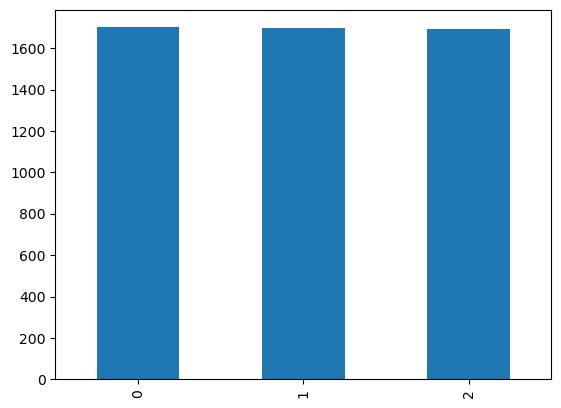

In [32]:
data['labels'].value_counts().plot(kind='bar')

In [33]:
print('레이블의 분포')
print(data.groupby('labels').size().reset_index(name='count'))

레이블의 분포
   labels  count
0       0   1700
1       1   1699
2       2   1693


In [34]:
print(f'중립의 비율 = {round(data["labels"].value_counts()[0]/len(data) * 100,3)}%')
print(f'긍정의 비율 = {round(data["labels"].value_counts()[1]/len(data) * 100,3)}%')
print(f'부정의 비율 = {round(data["labels"].value_counts()[2]/len(data) * 100,3)}%')

중립의 비율 = 33.386%
긍정의 비율 = 33.366%
부정의 비율 = 33.248%


In [35]:
data

,labels,kor_sentence
0,0,오늘 영상도 재밌게 시청하겠습니다
1,0,오 아침 업로드 귀하다
2,0,4개 계정으로 모두 추천했어요 에디션 당첨되시길
3,0,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다
4,0,BHXTHB 추천부탁드립니다 10연뽑기 가져다 드리겠습니다ㅎㅎ
...,...,...
5094,2,하 어제 16 4 올라왔는데 접어야하나
5095,2,초반에 사람 몰리는 이유는 리세마라때문입니다 방치수집게임은 뽑기가 첨이자끝인데 오...
5097,2,개인적으로 이분 현질 하츠 풀돌햇는데 시나 막히면 아니 이걸 어떻게 깨라고 만...
5098,2,뽑기 확률도 조작한거같고 애초에 개 창렬인데다가 확률 자체가 쓰레기고 재화 보상도 ...


In [36]:
X_data = data['kor_sentence']
y_data = data['labels']
print('본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

본문의 개수: 5092
레이블의 개수: 5092


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [38]:
print('훈련 샘플의 개수 :', len(X_train))
print('테스트 샘플의 개수 :', len(X_test))

훈련 샘플의 개수 : 4073
테스트 샘플의 개수 : 1019


In [39]:
print('--------훈련 데이터의 비율-----------')
print(f'중립 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print(f'부정 = {round(y_train.value_counts()[2]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
중립 = 33.391%
긍정 = 33.366%
부정 = 33.243%


In [40]:
print('--------테스트 데이터의 비율-----------')
print(f'중립 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')
print(f'부정 = {round(y_test.value_counts()[2]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
중립 = 33.366%
긍정 = 33.366%
부정 = 33.268%


In [41]:
max_seq_len = 128

In [42]:
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')

In [43]:
def convert_examples_to_features(examples, labels, max_seq_len, tokenizer):

    input_ids, attention_masks, token_type_ids, data_labels = [], [], [], []

    for example, label in tqdm(zip(examples, labels), total=len(examples)):
        # input_id는 워드 임베딩을 위한 문장의 정수 인코딩
        input_id = tokenizer.encode(example, max_length=max_seq_len, pad_to_max_length=True)

        # attention_mask는 실제 단어가 위치하면 1, 패딩의 위치에는 0인 시퀀스.
        padding_count = input_id.count(tokenizer.pad_token_id)
        attention_mask = [1] * (max_seq_len - padding_count) + [0] * padding_count

        # token_type_id은 세그먼트 인코딩
        token_type_id = [0] * max_seq_len

        assert len(input_id) == max_seq_len, "Error with input length {} vs {}".format(len(input_id), max_seq_len)
        assert len(attention_mask) == max_seq_len, "Error with attention mask length {} vs {}".format(len(attention_mask), max_seq_len)
        assert len(token_type_id) == max_seq_len, "Error with token type length {} vs {}".format(len(token_type_id), max_seq_len)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        data_labels.append(label)

    input_ids = np.array(input_ids, dtype=int)
    attention_masks = np.array(attention_masks, dtype=int)
    token_type_ids = np.array(token_type_ids, dtype=int)

    data_labels = np.asarray(data_labels, dtype=np.int32)

    return (input_ids, attention_masks, token_type_ids), data_labels

In [44]:
# train_X, train_y = convert_examples_to_features(X_train, y_train, max_seq_len=max_seq_len, tokenizer=tokenizer)

# 학습 데이터 변환
train_X, train_y = convert_examples_to_features(X_train, y_train, max_seq_len=max_seq_len, tokenizer=tokenizer)

  0%|          | 0/4073 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/ubuntu/anaconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 4073/4073 [00:00<00:00, 4472.4

In [45]:
# test_X, test_y = convert_examples_to_features(X_test, y_test, max_seq_len=max_seq_len, tokenizer=tokenizer)

# 검증 데이터 변환
val_X, val_y = convert_examples_to_features(X_test, y_test, max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 1019/1019 [00:00<00:00, 4482.75it/s]


In [46]:
input_id = train_X[0][0]
attention_mask = train_X[1][0]
token_type_id = train_X[2][0]
label = train_y[0]

print('단어에 대한 정수 인코딩 :',input_id)
print('어텐션 마스크 :',attention_mask)
print('세그먼트 인코딩 :',token_type_id)
print('각 인코딩의 길이 :', len(input_id))
print('정수 인코딩 복원 :',tokenizer.decode(input_id))
print('레이블 :',label)

단어에 대한 정수 인코딩 : [    2 25305  4778  2474  2267  2496 31369  1098   850  2031  2069  3636
  3732  1363  2075     3     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
어텐션 마스크 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [47]:
# TPU를 사용할 수 있는지 확인합니다
if 'COLAB_TPU_ADDR' in os.environ:
    # TPU가 사용 가능한 경우 TPU를 설정합니다
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)

    strategy = tf.distribute.experimental.TPUStrategy(resolver)
    print('TPU를 사용합니다.')
else:
    # TPU가 사용 불가능한 경우 CUDA GPU를 사용합니다
    physical_devices = tf.config.list_physical_devices('GPU')
    if len(physical_devices) == 0:
        raise RuntimeError("GPU를 찾을 수 없습니다. TensorFlow가 올바르게 설치되어 있는지 확인하세요.")

    # 모든 GPU 메모리를 필요에 따라 동적으로 할당하도록 설정합니다
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

    # CUDA GPU를 사용하는 경우 문자열 "/gpu:0"을 전달합니다
    strategy = tf.distribute.OneDeviceStrategy("/gpu:0")
    print('CUDA GPU를 사용합니다.')

CUDA GPU를 사용합니다.


2023-11-27 01:53:12.425087: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-27 01:53:12.438613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-27 01:53:12.440784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-27 01:53:12.446606: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
# 모델 학습
with strategy.scope():
    model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=3, from_pt=True)
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [48]:
# with strategy.scope():
#   model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=3, from_pt=True)
#   optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
#   loss = tf.keras.losses.SparseCategoricalCrossentropy()
#   #model.compile(optimizer=optimizer, loss=model.compute_loss, metrics = ['accuracy'])
#   model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=30,
    restore_best_weights=True
)

# ModelCheckpoint 설정
checkpoint_path = "best_model_self(2).h5"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# 모델 학습
model.fit(
    train_X, train_y, epochs=200, batch_size=32,
    validation_data=(val_X, val_y),
    callbacks=[early_stopping, model_checkpoint]
)

# 평가 데이터 변환
test_X, test_y = convert_examples_to_features(X_test, y_test, max_seq_len=max_seq_len, tokenizer=tokenizer)

In [51]:
# # EarlyStopping 설정
# early_stopping = EarlyStopping(
#     monitor="val_accuracy",
#     min_delta=0.001,
#     patience=30,
#     restore_best_weights=True
# )

# # ModelCheckpoint 설정
# checkpoint_path = "best_model_self(3).h5"
# model_checkpoint = ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_weights_only=True,
#     monitor='val_accuracy',  # val_loss를 기준으로 성능을 평가합니다
#     mode='max',  # 'min' 모드로 설정하여 val_loss가 최소일 때 모델을 저장합니다
#     save_best_only=True,
#     verbose=1
# )

# # 모델 학습
# model.fit(
#     train_X, train_y, epochs=200, batch_size=32, validation_split=0.2,
#     callbacks=[early_stopping, model_checkpoint]
# )


2023-11-27 01:53:23.254826: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_4465"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\020FlatMapDataset:4"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODUCT

Epoch 1/200
102/102 [==============================] - ETA: 0s - loss: 0.7455 - accuracy: 0.6648

2023-11-27 01:54:48.552953: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_24516"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\021FlatMapDataset:27"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODU


Epoch 1: val_accuracy improved from -inf to 0.73865, saving model to best_model_self(2).h5
102/102 [==============================] - 95s 788ms/step - loss: 0.7455 - accuracy: 0.6648 - val_loss: 0.6030 - val_accuracy: 0.7387
Epoch 2/200
102/102 [==============================] - ETA: 0s - loss: 0.3767 - accuracy: 0.8610
Epoch 2: val_accuracy improved from 0.73865 to 0.74724, saving model to best_model_self(2).h5
102/102 [==============================] - 81s 790ms/step - loss: 0.3767 - accuracy: 0.8610 - val_loss: 0.6398 - val_accuracy: 0.7472
Epoch 3/200
102/102 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9503
Epoch 3: val_accuracy improved from 0.74724 to 0.77791, saving model to best_model_self(2).h5
102/102 [==============================] - 81s 792ms/step - loss: 0.1601 - accuracy: 0.9503 - val_loss: 0.7106 - val_accuracy: 0.7779
Epoch 4/200
102/102 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9708
Epoch 4: val_accuracy did n

Epoch 58/200
102/102 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9979
Epoch 58: val_accuracy did not improve from 0.81718
102/102 [==============================] - 77s 760ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 1.3319 - val_accuracy: 0.8037
Epoch 59/200
102/102 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9979
Epoch 59: val_accuracy did not improve from 0.81718
102/102 [==============================] - 77s 760ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 1.4216 - val_accuracy: 0.7902
Epoch 60/200
102/102 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9979
Epoch 60: val_accuracy did not improve from 0.81718
102/102 [==============================] - 77s 760ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 1.4279 - val_accuracy: 0.7890
Epoch 61/200
102/102 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9988
Epoch 61: val_accuracy did not improve from 0.8171

In [ ]:
# 모델 평가
model.evaluate(test_X, test_y, batch_size=32)

In [52]:
# model.evaluate(test_X, test_y, batch_size=1024)

2023-11-27 04:16:29.834541: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_103851"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:1246"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PR

1/1 [==============================] - 8s 8s/step - loss: 1.3221 - accuracy: 0.8224


[1.322080373764038, 0.8223748803138733]

In [ ]:
# best_model_self(2).h5
# 1/1 [==============================] - 8s 8s/step - loss: 1.3221 - accuracy: 0.8224
# [1.322080373764038, 0.8223748803138733]

In [ ]:
# best_model_self(3).h5
